# ECSE556 - HW1

## Preprocessing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
np.random.seed(0) # fixing the seed for reproducibility

In [14]:
sns.set_style("darkgrid")

In [4]:
data_path = os.path.join("TG_LASSO_GeneExpressionInput", "gdsc_expr_postCB.csv")
data = pd.read_csv(data_path, index_col=0, header=0)
data.head()

,906877,906798,906872,906873,906870,906871,906793,906792,906791,1330933,...,907317,907318,907319,1299059,684059,684052,684057,687807,684055,1322213
ENSG00000000003,2.508729,7.037164,2.577397,7.045888,4.543037,6.801862,5.300144,5.933979,6.911063,2.613291,...,6.883014,7.880665,7.088381,7.437321,7.009003,6.127656,6.923300,6.758779,7.313623,4.855711
ENSG00000000419,8.968814,9.032526,8.567381,8.617857,7.873480,8.888909,8.892322,7.913833,7.615324,7.769731,...,9.029970,9.084141,8.425315,7.433776,7.935236,8.072725,8.172654,7.131534,8.147621,8.349442
ENSG00000000457,4.432231,2.931877,2.560122,2.654424,3.753498,3.204206,3.757574,3.268314,3.680308,3.584446,...,3.180330,2.901296,2.350121,3.739198,2.957672,3.114235,3.774264,2.935753,3.586686,2.808046
ENSG00000000460,3.887446,1.713152,2.167990,2.196951,2.760429,2.628319,2.443053,2.804103,3.997609,2.491433,...,2.214473,1.844454,1.831997,2.325919,2.352136,2.605327,2.839715,3.004388,2.100455,2.297867
ENSG00000000938,2.575608,2.447280,2.777488,2.439445,2.762941,2.919733,2.570636,2.595269,2.643118,2.713652,...,2.525579,2.739947,2.493749,2.523586,2.359968,2.377841,2.427464,2.811448,2.618779,2.584757


In [4]:
data.shape

(13941, 979)

We transpose the dataframe because the standard is to have the columns be the features and the rows the samples.

In [5]:
df = data.transpose()
df.head()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000261685,ENSG00000261701,ENSG00000261857,ENSG00000263002,ENSG00000263843,ENSG00000264247,ENSG00000264575,ENSG00000265298,ENSG00000265929,ENSG00000266282
906877,2.508729,8.968814,4.432231,3.887446,2.575608,2.586929,5.154627,5.475647,3.211070,2.912748,...,1.484100,1.364339,2.065464,1.887633,2.820525,4.130071,1.433686,7.758634,5.598889,6.081642
906798,7.037164,9.032526,2.931877,1.713152,2.447280,8.277736,6.747967,5.465632,4.995557,2.729889,...,2.399529,0.383567,1.638664,2.924881,1.702484,3.009300,3.261519,5.199038,1.164300,5.581635
906872,2.577397,8.567381,2.560122,2.167990,2.777488,6.430931,6.566853,3.708243,4.132845,1.819089,...,1.966760,0.121532,2.978170,4.424899,1.832430,3.041152,4.051381,6.752677,1.036525,7.312342
906873,7.045888,8.617857,2.654424,2.196951,2.439445,4.854298,7.039492,2.479791,4.044124,1.805946,...,1.496517,0.593483,1.613982,3.335999,2.179198,2.699835,3.245175,6.719169,1.108325,5.444833
906870,4.543037,7.873480,3.753498,2.760429,2.762941,2.587265,2.937735,4.397153,4.741584,1.452968,...,1.823126,2.084164,1.851725,2.669694,2.238795,2.507146,2.271928,5.988098,1.476228,4.487966


In [6]:
df.shape

(979, 13941)

We split the dataset into training and evaluation, to avoid data leakage and biases. (seed is fixed)

In [6]:
# split the dataset
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=0)
df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)
print(f"Shape of training set: {train.shape}")
print(f"Shape of test set: {test.shape}")

Shape of training set: (783, 13941)
Shape of test set: (196, 13941)


We scale the dataset. Most algorithm work best when the data are scaled.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_train)

## Dimensionality Reduction

### PCA

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
np_pca_projected = pca.fit_transform(df_scaled)

In [10]:
np_pca_projected.shape

(783, 2)

/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'PCA dimensionality reduction')

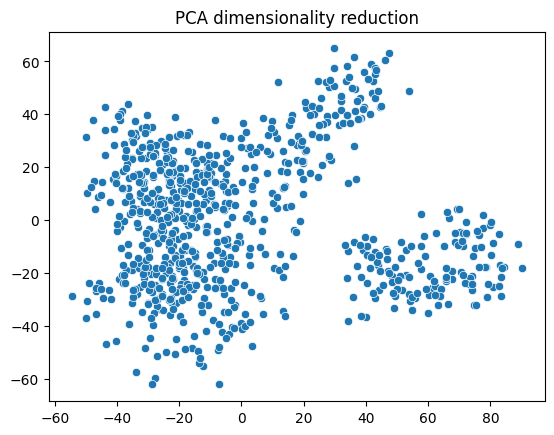

In [11]:
sns.scatterplot(x=np_pca_projected[:,0], y=np_pca_projected[:,1])
plt.title("PCA dimensionality reduction")

### t-SNE

In [12]:
from sklearn.manifold import TSNE

In [13]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=2000, random_state=0)
np_tsne_projected = tsne.fit_transform(df_scaled)

In [14]:
np_tsne_projected.shape

(783, 2)

/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 't-SNE dimensionality reduction')

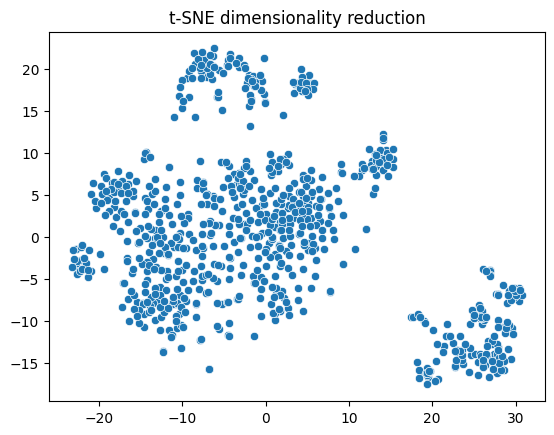

In [15]:
sns.scatterplot(x=np_tsne_projected[:,0], y=np_tsne_projected[:,1])
plt.title("t-SNE dimensionality reduction")

### UMAP

In [16]:
from umap import UMAP

In [17]:
np_umap_projected = UMAP().fit_transform(df_scaled)

In [18]:
np_umap_projected.shape

(783, 2)

/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'UMAP dimensionality reduction')

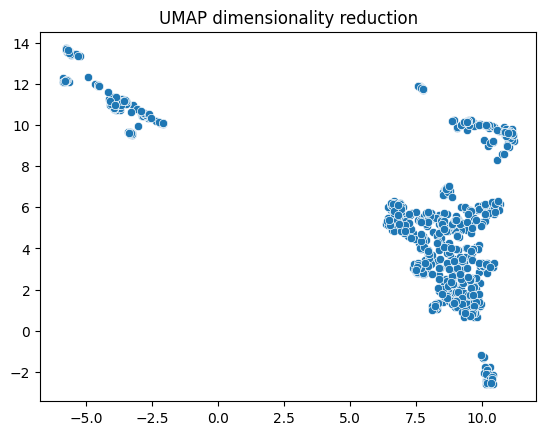

In [19]:
sns.scatterplot(x=np_umap_projected[:,0], y=np_umap_projected[:,1])
plt.title("UMAP dimensionality reduction")

### All together

/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

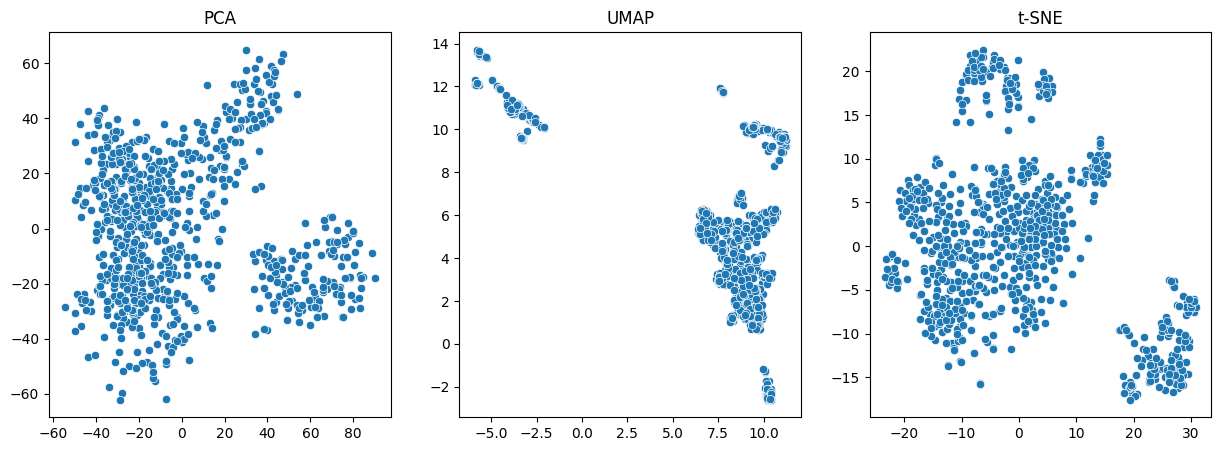

In [26]:
# make a subplot with the three plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=np_pca_projected[:,0], y=np_pca_projected[:,1], ax=axes[0])
axes[0].set_title("PCA")

sns.scatterplot(x=np_umap_projected[:,0], y=np_umap_projected[:,1], ax=axes[1])
axes[1].set_title("UMAP")

sns.scatterplot(x=np_tsne_projected[:,0], y=np_tsne_projected[:,1], ax=axes[2])
axes[2].set_title("t-SNE")
# plt.savefig("./images/tight_dimensionality_reduction.png", bbox_inches='tight')

We observe that the three methods produce very different representations of the input features.

## Clustering

### Agglomerative and K-means clustering

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
agglo = AgglomerativeClustering(n_clusters=3)

In [31]:
agglo_clustering = agglo.fit_predict(df_scaled)

In [32]:
agglo_clustering.shape

(783,)

In [33]:
np.unique(agglo_clustering)

array([0, 1, 2])

In [34]:
from sklearn.cluster import KMeans

In [35]:
kmeans = KMeans(n_clusters=3)

In [36]:
k_clustering = kmeans.fit_predict(df_scaled)

/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
k_clustering.shape

(783,)

In [38]:
np.unique(k_clustering)

array([0, 1, 2], dtype=int32)

Counting the number of samples attributed to each cluster

In [39]:
print("For agglomerative clustering:")
for i in range(3):
    print(f"Number of samples in cluster {i}: {np.sum(agglo_clustering == i)}")
print("For K-means clustering:")
for i in range(3):
    print(f"Number of samples in cluster {i}: {np.sum(k_clustering == i)}")

For agglomerative clustering:
Number of samples in cluster 0: 509
Number of samples in cluster 1: 134
Number of samples in cluster 2: 140
For K-means clustering:
Number of samples in cluster 0: 123
Number of samples in cluster 1: 529
Number of samples in cluster 2: 131


We note that the proportion of samples in each cluster is very close. For further comparison of the methods, we should see if the samples belong to the same clusters. This is what we do in the following section.

/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

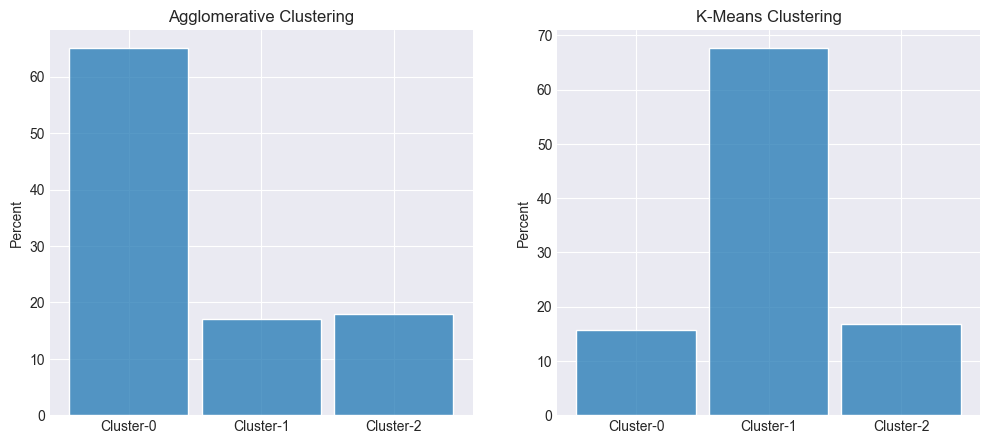

In [40]:
# plot the two distributions of classes on each subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].set_title("Agglomerative Clustering")
axes[1].set_title("K-Means Clustering")
# hist plot
sns.histplot(agglo_clustering, ax=axes[0], discrete=True, stat="percent", shrink=.9)
axes[0].xaxis.set_ticks([0, 1, 2], ["Cluster-0", "Cluster-1", "Cluster-2"])
sns.histplot(k_clustering, ax=axes[1], discrete=True, stat="percent", shrink=.9)
axes[1].xaxis.set_ticks([0, 1, 2],["Cluster-0", "Cluster-1", "Cluster-2"])

### Jacard similarity scores between clusters

In [9]:
from sklearn.metrics import jaccard_score

In [64]:
similarity_scores = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        similarity_score = jaccard_score((agglo_clustering==i).astype("int32"), (k_clustering==j).astype("int32"))
        similarity_scores[i, j] = similarity_score
        print(f"Similarity score for clusters {i} vs {j}: {similarity_score}")
        

Similarity score for clusters 0 vs 0: 0.9511278195488722
Similarity score for clusters 0 vs 1: 0.0
Similarity score for clusters 0 vs 2: 0.0047694753577106515
Similarity score for clusters 1 vs 0: 0.004545454545454545
Similarity score for clusters 1 vs 1: 0.9776119402985075
Similarity score for clusters 1 vs 2: 0.0
Similarity score for clusters 2 vs 0: 0.030816640986132512
Similarity score for clusters 2 vs 1: 0.0
Similarity score for clusters 2 vs 2: 0.8391608391608392


In [68]:
df_similarity_scores = pd.DataFrame(similarity_scores, columns=["Cluster 0", "Cluster 1", "Cluster 2"], index=["Cluster 0", "Cluster 1", "Cluster 2"])
df_similarity_scores

,Cluster 0,Cluster 1,Cluster 2
Cluster 0,0.951128,0.000000,0.004769
Cluster 1,0.004545,0.977612,0.000000
Cluster 2,0.030817,0.000000,0.839161


### Concordance scores between clustering methods

In [10]:
from sklearn.metrics import rand_score, adjusted_rand_score

In [72]:
rand = rand_score(agglo_clustering, k_clustering)
rand

0.9465332693130559

In [71]:
adjusted_rand = adjusted_rand_score(agglo_clustering, k_clustering)
adjusted_rand

0.8931275441779937

### Different distance metrics for the Agglomerative Clustering method

Now we try variations of the Agglomerative Clustering method by using different distance metrics that we want to compare.

In [11]:
agglo_cosine = AgglomerativeClustering(n_clusters=3, metric="cosine", linkage="average")
agglo_eucli = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="average")

In [12]:
agglo_cosine_clusters = agglo_cosine.fit_predict(df_scaled).astype("int32")
agglo_eucli_clusters = agglo_eucli.fit_predict(df_scaled).astype("int32")

First, let's observe the size of each cluster, for each method.

In [14]:
print(np.unique(agglo_cosine_clusters))
print(np.unique(agglo_eucli_clusters))

[0 1 2]
[0 1 2]


/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rbazin/projects/ML/ECSE556-HW1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

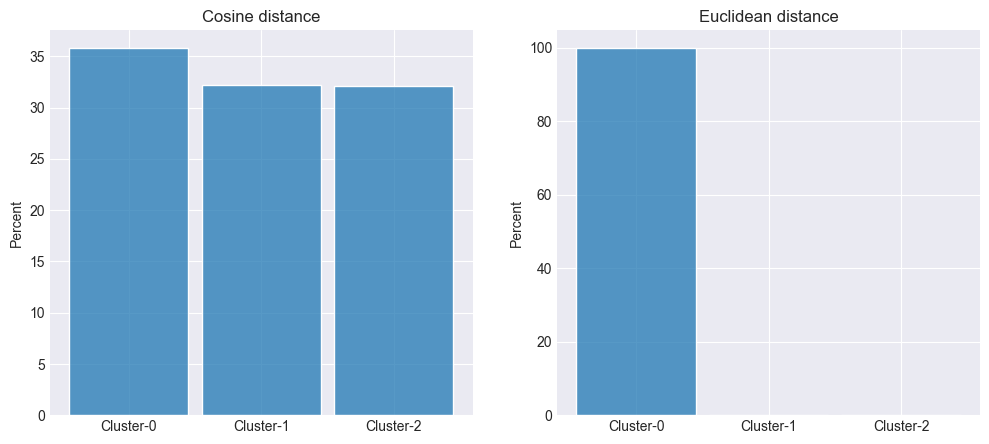

In [27]:
# plot the two distributions of classes on each subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].set_title("Cosine distance")
axes[1].set_title("Euclidean distance")
# hist plot
sns.histplot(agglo_cosine_clusters, ax=axes[0], discrete=True, stat="percent", shrink=.9)
axes[0].xaxis.set_ticks([0, 1, 2], ["Cluster-0", "Cluster-1", "Cluster-2"])
sns.histplot(agglo_eucli_clusters, ax=axes[1], discrete=True, stat="percent", shrink=.9)
axes[1].xaxis.set_ticks([0, 1, 2],["Cluster-0", "Cluster-1", "Cluster-2"])


Using the Euclidian distance with the agglomerative method yields a poor representation of the dataset, as all the samples are attributed to the same cluster.

Let's quantify the similarity between these clusters.

In [15]:
similarity_scores = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        similarity_score = jaccard_score((agglo_cosine_clusters==i).astype("int32"), (agglo_eucli_clusters==j).astype("int32"))
        similarity_scores[i, j] = similarity_score
        print(f"Similarity score for clusters {i} vs {j}: {similarity_score}")

Similarity score for clusters 0 vs 0: 0.3585147247119078
Similarity score for clusters 0 vs 1: 0.0
Similarity score for clusters 0 vs 2: 0.0
Similarity score for clusters 1 vs 0: 0.31928480204342274
Similarity score for clusters 1 vs 1: 0.003968253968253968
Similarity score for clusters 1 vs 2: 0.003968253968253968
Similarity score for clusters 2 vs 0: 0.3213828425096031
Similarity score for clusters 2 vs 1: 0.0
Similarity score for clusters 2 vs 2: 0.0


In [16]:
pd.DataFrame(similarity_scores, columns=["Cluster 0", "Cluster 1", "Cluster 2"], index=["Cluster 0", "Cluster 1", "Cluster 2"])

,Cluster 0,Cluster 1,Cluster 2
Cluster 0,0.358515,0.000000,0.000000
Cluster 1,0.319285,0.003968,0.003968
Cluster 2,0.321383,0.000000,0.000000


In [18]:
rand = rand_score(agglo_cosine_clusters, agglo_eucli_clusters)
adjusted_rand = adjusted_rand_score(agglo_cosine_clusters, agglo_eucli_clusters)
print(f"Rand score: {rand}")
print(f"Adjusted rand score: {adjusted_rand}")

Rand score: 0.33519841386496296
Adjusted rand score: 0.0001969931163854306


In [28]:
len(agglo_eucli_clusters==0)

783

All the samples are gathered in the same cluster using the euclidean distance.